# Redes neuronales con Tensorflow
Curso: Aplicaciones del aprendizaje automático usando Python <br>
Actividad 6: Biblioteca Tensorflow<br> <br>


En esta actividad se utiliza la biblioteca libre para machine learning Scikit. Se utiliza la base de datos iris que contiene información de tres tipos de flores distintas. Se hace una partición de la base de datos en datos de entrenamiento, prueba, validación cruzada y se utilizan métricas para probar la eficiancia de los algoritmos.


Este código fue obtenido del tutorial de Tensorflow "Basic classification" https://www.tensorflow.org/tutorials/keras/basic_classification con licencia https://creativecommons.org/licenses/by/4.0/

Objetivos:
1. Trabajar con la biblioteca Tensorflow y Keras
2. Explorar los datos
3. Preprocesar los datos
4. Construir el modelo de redes neuronales
5. Compilar el modelo
6. Entrenar el modelo
7. Evaluar la exactitud
8. Hacer predicciones



### Trabajar con la biblioteca TensorFlor y Keras
En este código se entrena un modelo de red neuronal para clasificar imagenes de ropa, como tenis y camisetas. 

Se utiliza Keras, que es una API de alto nivel para construir y entrenar modelos en TensorFlow.

In [98]:
from __future__ import absolute_import, division, print_function, unicode_literals

# se importa la biblioteca Tensorflow y Keras
import tensorflow as tf
from tensorflow import keras

# Se importa numpy para manejo de datos y matplotlib para grafica
import numpy as np
import matplotlib.pyplot as plt

#Se imprime la versión de tensorflow
print(tf.__version__)


2.10.0


Se importa el conjunto de datos "Fashion" de MNIST.

Este conjunto de datos contiene 70,000 imagenes en grises en 10 categorías. Las imágenes muestran artículos de ropa individuales con una resolución de 28x28 pixeles.

Um ejemplo de cómo se ven estas imágenes se muestra en la Figura 1.

<img src="fashion-mnist-sprite.png">
Figura 1. Una muestra de Fashion-MNIST (por Zalando, MIT License).

Se usarán 60,000 imágenes para entrenar una red neuronal, y 10,000 imágenes para evaluar que tan bien aprendió la red para clasificar imágenes. Se puede acceder al conjunto de datos Fashion MNIST directamente de TensorFlow, solo se requiere importar y cargar los datos.

In [99]:
#Importar el conjunto de datos Fashion MNIST
fashion_mnist = keras.datasets.fashion_mnist

#Cargar el conjunto de datos, 
#Las imagenes y etiquetas que se usarán para el entrenamiento estan en (train_images, train_labels)
#Las imagenes y etiquetas que se usarán para la prueba estan en ((test_images, test_labels)
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()


Al cargar el conjunto de datos se regresan arreglos numpy de 28x28, con pixeles que tienen valores en un rango de 0 a 255. Las etiquetas son un arreglo de enteros, que van desde 0  a 9. Estas corresponden a las clases de la ropa que representa la imagen:

| Label | Class | 
| --- | --- |
| 0 | Blusa/Camiseta| 
| 1 | Pantalón | 
| 2 | Suéter | 
| 3 | Vestido | 
| 4 | Abrigo | 
| 5 | Sandalia | 
| 6 | Camisa | 
| 7 | Tenis | 
| 8 | Bolsa | 
| 9 | Bota | 

Cada imagen esta mapeada a solo una etiqueta. Ya que los nombres de las clases no estan incluidos en el conjunto de datos, hay que guardarlos en la siguiente lista para usarlas cuando se quiera identificar a las imágenes.


In [100]:
class_names = ['Blusa/Camiseta', 'Pantalón', 'Suéter', 'Vestido', 'Abrigo',
               'Sandalias', 'Camisa', 'Tenis', 'Bolsa', 'Bota']


### Explorar los datos

Antes de entrenar el modelo, primero se explorará el formato del conjutno de datos. La siguiente función indica que hay 60,000 imágenes en los datos de entrenamiento y cada imagen se representa con 28x28 pixeles

In [101]:
#Obtener la forma del arreglo numpy con las imágenes de entrenamiento
train_images.shape


(60000, 28, 28)

De la misma forma, hay 60,000 etiquetas en el conjunto de entrenamiento

In [102]:
#Obtener la cantidad de elementos en el arreglo numpy con las etiquetas de entrenamiento 
len(train_labels)


60000

Cada etiqueta es un valor entero entre 0 y 9:

In [103]:
#Mostrar el arreglo de etiquetas
train_labels


array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

Hay 10,000 imágenes en el conjunto de datos de prueba. De la misma forma, cada imagen se representa con 28x28 pixeles.

In [104]:
#Obtener la forma del arreglo numpy con las imágenes de prueba
test_images.shape


(10000, 28, 28)

De la misma forma, hay 10,000 etiquetas en el conjunto de prueba

In [105]:
#Obtener la cantidad de elementos en el arreglo numpy con las etiquetas de prueba 
len(test_labels)


10000

### Preprocesar los datos

Los datos se deben preprocesar antes de entrenar la red neuronal. Si inspeccionas la primer imagen en el conjunto de datos de entrenamiento, verás que cada valor de pixel esta en el rango de 0 a 255.

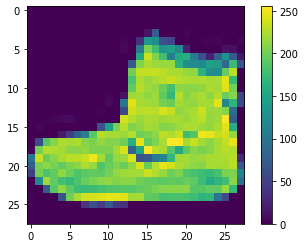

In [106]:
#Mostrar la primer imagen
plt.figure()
plt.imshow(train_images[0])
#Colocar una barra de colores que indica los valores de los pixeles
plt.colorbar()
plt.grid(False)
plt.show()


Se escalan estos valores a un rango de 0 a 1 antes de introducir los datos al modelo de la red neuronal. Para ello, se divide el valor sobre 255. Es importante que tanto el conjunto de entrenamiento como de prueba se procesen de la misma forma.

In [107]:
#Se divide el conjunto de entrenamiento sobre 255
train_images = train_images / 255.0
#Se divide el conjunto de prueba sobre 255
test_images = test_images / 255.0


Despliega las primeras 25 imágenes del conjunto de entrenamiento y despliega el nombre de la clase debajo de cada imagen. Verifica que los datos esta en una forma correcta y que estamos listo para construir y entrenar una red.

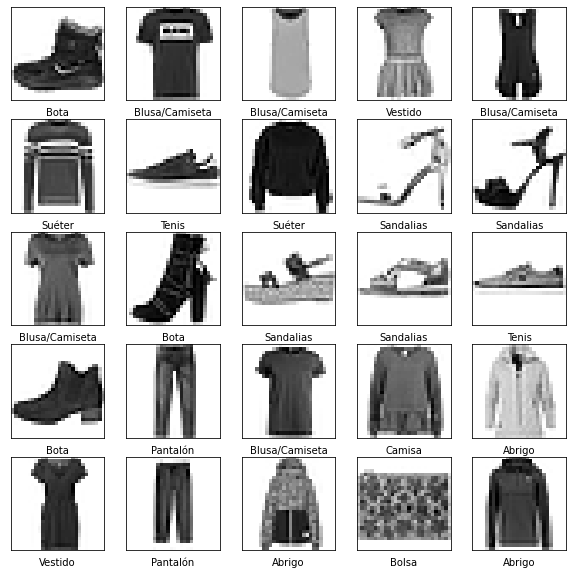

In [108]:
plt.figure(figsize=(10,10))
for i in range(25):
    #Grafica en la subgráfica i 
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    # Grafica la imagen i
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    #Incluye la etitqueta de la imagen 1
    plt.xlabel(class_names[train_labels[i]])
plt.show()


### Construir el modelo de redes neuronales

Para construir la red neuronal se requiere configurar las capas del modelo y después compilar el modelo.

El bloque de construcción básico de una red neuronal es la capa. Las capas extraen representaciones de los datos con los que se les administra. Estas representaciones son representativas del problema.

La mayor parte del aprendizaje profundo consiste en concatenar capas simples. La mayor parte de las capas, como las de tf.keras.layers.Dense, tienen parámetros que se aprenden durante el entrenamiento.

In [109]:
#Se definen las capas
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])


La primera capa en esta red, tf.keras.layers.Flatten, transforma el formato de las imagenes de un areglo 2d (de 28x28 pixeles), a un arreglo de 1d de 28x28=784 pixeles. Piensa en esta capa como un desapilamiento en renglones  de los pixeles de la imagen de forma que queden alineados. En esta capa no existe ningún parámetro por aprender ya que solo reformatea los datos.

Ya que los pixeles se han aplanado, la red consiste en una secuencia de dos capas tf.keras.layers.Dense. Estas son capas  de redes neuronales densamente conectadas, o completamente conectadas. La primera capa densa tiene 128 nodos (o neuronas). La segunda (y última) capa tiene 10 nodos con softmax que regresa un arreglo con la puntiación en probabilidad de 10 elementos que suma 1. Cda nodo contiene una puntuación que indica la probabilidad que la imagen actual pertenece a una de las 10 clases.


### Compilar el modelo
Antes de que el modelo esté listo para el entrenamiento, necesita unos cuantos ajustes más. Estos se agregan durante la etapa de compilación del modelo.

    Loss function — Indica que tan bueno es el modelo durante el entrenamiento. Queremos minimizar esta función para "dirigir" el modelo en la dirección correcta.
    Optimizer — Asi es como el modelo se actualiza basado en los datos y ve como es la función loss.
    Metrics — Se usa para monitorear los pasos de entrenamiento y de prueba. El ejemplo siguiente usa la medida exactitud, que indica la fracción de las imagenes que son clasificadas correctamente.
    


In [110]:
#Compilar el modelo
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


### Entrenar el modelo

Para entrenar un modelo de red neuronal se requieren los siguientes pasos:

    Alimenta el modelo con los datos de entrenamiento de este ejemplo, es decir, con los arreglos train_images y train_labels.
    El modelo aprende a asociar las imágenes con las etiquetas.
    Le pedimos al modelo a hacer predicciones sobre un conjunto de datos de prueba, el de este ejemplo es el arreglo test_images. Verificamos que las predicciones concuerdan con las etiquetas del arreglo test_labels.

Para empezar el entrenamiento, llamamos al método *model.fit* de forma que el modelo se ajusta a los datos de entrenamiento.


In [111]:
#Ajuste del modelo a los datos de entrenamiento
model.fit(train_images, train_labels, epochs=5)


Epoch 1/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5008 - accuracy: 0.8232
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3777 - accuracy: 0.8639
Epoch 3/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3399 - accuracy: 0.8752
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3140 - accuracy: 0.8845
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2971 - accuracy: 0.8915


En lo que el modelo se entrena, se despliega la pérdida (loss) y la métrica de exactitud (accuracy). Este modelo llega a una exactitud de cerca de 0.88 (o 88%) en los datos de entrenamiento.

### Evaluar la exactitud

Ahora, comparamos como se desempeña el modelo en los datos de prueba:


In [112]:
#Evaluar el modelo en los datos de prueba, la pérdida (loss) se almacena en test_loss, la exactitud en test_acc
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)


313/313 [==============================] - 1s 2ms/step - loss: 0.3819 - accuracy: 0.8606
Test accuracy: 0.8605999946594238


Como se observa, la exactitud en el conjunto de datos de prueba es un poco menor que la exactitud en los datos de entrenamiento. Esta brecha entre la exactitud de entrenamiento y de prueba es un ejemplo denominado sobreajuste (overfitting). Este sobreajuste sucede cuando un modelo de aprendizaje automático funciona peor en datos nuevos que en los datos de entrenamiento.

### Hacer predicciones

Con el modelo entrenado, podemos usarlo para hacer predicciones sobre algunas imágenes.

In [113]:
#Predecir sobre las imagenes de prueba
predictions = model.predict(test_images)


313/313 [==============================] - 1s 2ms/step


El modelo ha predicio las etiquetas para cada imagen del conjunto de prueba y se almacena en el arreglo *predictions*. Revisemos la primera predicción.

In [114]:
predictions[0]


array([3.9063752e-07, 5.2727916e-10, 4.9259175e-08, 9.0220981e-10,
       5.0719596e-08, 1.8361831e-03, 2.7369171e-07, 3.4921747e-03,
       1.2980373e-06, 9.9466962e-01], dtype=float32)

La predicción es un arreglo con 10 números. Estos describen la "confianza" del modelo de que la imagen corresponde a cada uno de los 10 distintos artículos de ropa. Podemos ver cual etiqueta tiene el valor de confianza más alto.

In [115]:
#Encotrar la etiqueta con el valor más alto
np.argmax(predictions[0])


9

En este caso, el modelo tiene más confianza de que la imagen es una bota, o class_names[9]. Podemos comparar con los valores que ya conocemos de las etiquetas del conjunto de prueba para revisar si concuerdan:

In [116]:
test_labels[0]


9

Podemos graficar para observar las primeras 10 predicciones

In [117]:
#Función para graficar la imagen predicha
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img, cmap=plt.cm.binary)
  
  predicted_label = np.argmax(predictions_array)
    #Si hay una discrepancia entre la clase predicha y la correcta entonces el color es rojo, si todo esta correcto es azúl.
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  #Coloca el texto con el nombre de la clase y la confianza de predicción
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)
#Función para graficar el arreglo de predicciones
def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)
    #Si hay una discrepancia entre la clase predicha y la correcta entonces el color es rojo, si todo esta correcto es azúl.

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')


Veamos la imagen 0, su prediccion y el arreglo de predicciones.

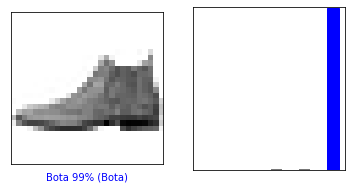

In [118]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
#graficar la imagen predicha
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
#graficar el arreglo de predicciones
plot_value_array(i, predictions,  test_labels)
plt.show()


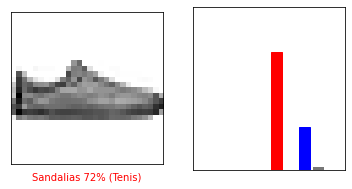

In [119]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
#graficar la imagen predicha
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
#graficar el arreglo de predicciones
plot_value_array(i, predictions,  test_labels)
plt.show()


Vamos a graficar varias imágenes con sus predicciones. Las predicciones correctas están en azúl y las incorrectas en rojo. El número indicado da el porcentaje (de 100) para la etiqueta predicha. Note que puede estar equivocado aunque tenga mucha confianza.

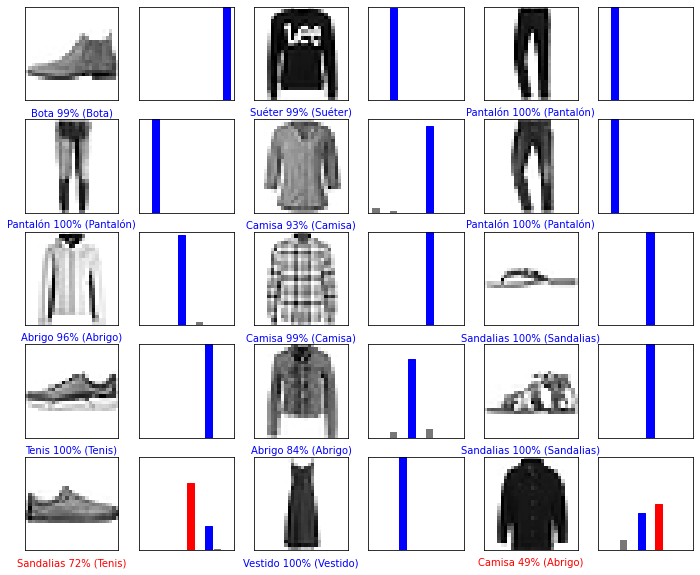

In [120]:
# Graficar las primeras X imagenes de prueba, su etiqueta predicha y la verdadera etiqueta
# Las predicciones correctas están en azúl, las incorrectas en rojo
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)
plt.show()


Finalmente, usamos el modelo para predecir sobre una imagen sencilla.

In [121]:
# Toma una imagen del conjunto de datos de prueba
img = test_images[0]

print(img.shape)


(28, 28)


Los modelos tf.keras se optimizan para hacer predicciones en lotes o colecciones de ejemplos de una sola vez. Asi que aunque se use una sola imagen, se necesita agregar a una lista.


In [122]:
# Agrega la imagen a un lote en donde es la única imagen
img = (np.expand_dims(img,0))

print(img.shape)


(1, 1, 28, 28)


Ahora predice la imagen

In [123]:
predictions_single = model.predict(img)

print(predictions_single)


1/1 [==============================] - 0s 72ms/step
[[3.9063784e-07 5.2727911e-10 4.9259167e-08 9.0221142e-10 5.0719883e-08
  1.8361856e-03 2.7369222e-07 3.4921758e-03 1.2980408e-06 9.9466950e-01]]


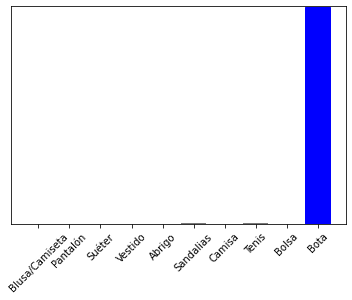

In [124]:
#Grafica las predicciones
plot_value_array(0, predictions_single, test_labels)
plt.xticks(range(10), class_names, rotation=45)
plt.show()


model.predict regresa una lista de listas, una para cada imagen en el lote de datos. Toma la predicciones de la (única) imagen en el lote:

In [125]:
prediction_result = np.argmax(predictions_single[0])
print(prediction_result)


9


Como se mostró anteriormente, el modelo predice que es clase 9 o bota.

https://www.tensorflow.org/tutorials/keras/classification